# 🚢 Predição de Sobrevivência no Titanic com Naive Bayes

Bem-vindo ao experimento prático de Machine Learning! Neste notebook, vamos construir um modelo para prever a sobrevivência de passageiros do Titanic usando o algoritmo **Naive Bayes**. Cada etapa será explicada de forma didática e tornar o estudo mais agradável.

## 📦 Objetivo do Projeto

- Desenvolver um modelo preditivo para identificar sobreviventes do Titanic.
- Utilizar o algoritmo **Naive Bayes** e boas práticas de ciência de dados.
- Explicar cada etapa do processo, justificando as escolhas feitas.

## 📖 Dicionário de Dados

| **Coluna**       | **Descrição**                                              | **Tipo de Dado** |
|------------------|----------------------------------------------------------|-----------------|
| `survived`      | Indica se o passageiro sobreviveu (1 = Sim, 0 = Não)     | Numérico (int) |
| `pclass`        | Classe do bilhete (1 = Primeira, 2 = Segunda, 3 = Terceira) | Numérico (int) |
| `sex`           | Sexo do passageiro (`male` = Masculino, `female` = Feminino) | Categórico (string) |
| `age`           | Idade do passageiro                                        | Numérico (float) |
| `sibsp`         | Número de irmãos/cônjuges a bordo                         | Numérico (int) |
| `parch`         | Número de pais/filhos a bordo                             | Numérico (int) |
| `fare`          | Tarifa paga pelo bilhete                                  | Numérico (float) |
| `embarked`      | Porto de embarque (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton) | Categórico (string) |
| `class`         | Classe do passageiro (`First`, `Second`, `Third`)        | Categórico (string) |
| `who`           | Tipo de passageiro (`man`, `woman`, `child`)             | Categórico (string) |
| `adult_male`    | Indica se o passageiro é um homem adulto (`True`, `False`) | Booleano |
| `deck`          | Deck da cabine (letras `A` a `G`, ou `NaN` se desconhecido) | Categórico (string) |
| `embark_town`   | Nome do porto de embarque (`Cherbourg`, `Queenstown`, `Southampton`) | Categórico (string) |
| `alive`         | Indica se o passageiro sobreviveu (`yes`, `no`)           | Categórico (string) |
| `alone`         | Indica se o passageiro estava viajando sozinho (`True`, `False`) | Booleano |

## 🗂️ Etapas do Experimento

1. 🔍 **Análise Exploratória dos Dados (EDA)**
2. 🔎 **Análise de Correlação e Seleção de Variáveis**
3. 🛠️ **Pré-processamento dos Dados**
4. ✂️ **Divisão em Treino e Teste**
5. 🔄 **Pipeline: Pré-processamento + Modelo + Avaliação**
6. 🤖 **Treinamento do Modelo Naive Bayes**
7. 🧪 **Avaliação do Modelo**
8. 🧑‍💻 **Teste com Caso Real**
9. 📈 **Curva ROC/AUC**
10. 🔁 **Comparação com Regressão Logística e Melhorias**
11. 🧪 **Avaliação do Modelo**
12. 🧑‍💻 **Teste com Caso Real**
13. 📈 **Curva ROC/AUC**

### 📍 Importação das bibliotecas

  Vamos importar as bibliotecas necessárias para a análise exploratória dos dados.

In [155]:
# Importing necessary libraries for data analysis and preprocessing
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization

# Libraries for machine learning preprocessing
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict  # For splitting the dataset and cross-validation
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # For encoding categorical data and scaling numerical data
from sklearn.naive_bayes import GaussianNB  # For Naive Bayes classification
from sklearn.linear_model import LogisticRegression  # For Logistic Regression comparison
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve # For evaluating model performance
from sklearn.pipeline import Pipeline # For creating a machine learning pipeline
from sklearn.compose import ColumnTransformer # For applying different preprocessing steps to different columns
from sklearn.decomposition import PCA # For dimensionality reduction
from sklearn.preprocessing import StandardScaler # For feature scaling

### 📝 Carregando dos Dados

In [156]:
df = sns.load_dataset("titanic") # Load the Titanic dataset from seaborn

print(df.info())  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


## 🔍 Análise Exploratória dos Dados (EDA)

Antes de qualquer modelagem, é fundamental entender o conjunto de dados. Vamos visualizar distribuições, identificar padrões e possíveis problemas (como valores ausentes ou outliers).

- **Por que fazer EDA?**
  - Descobrir relações entre variáveis
  - Identificar dados faltantes
  - Detectar possíveis outliers
  - Guiar decisões de pré-processamento

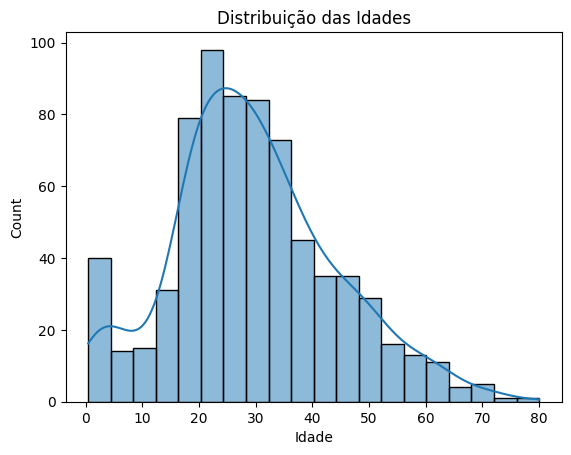

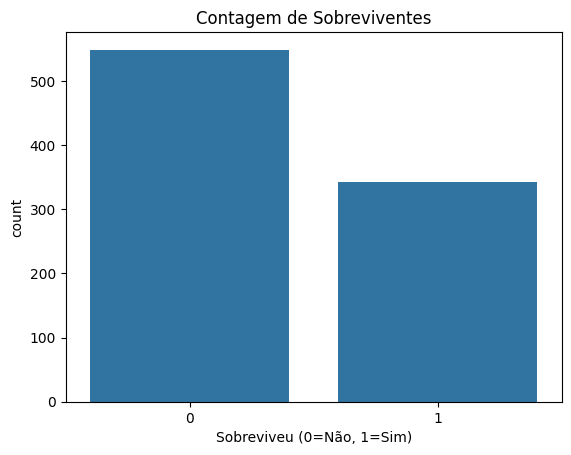

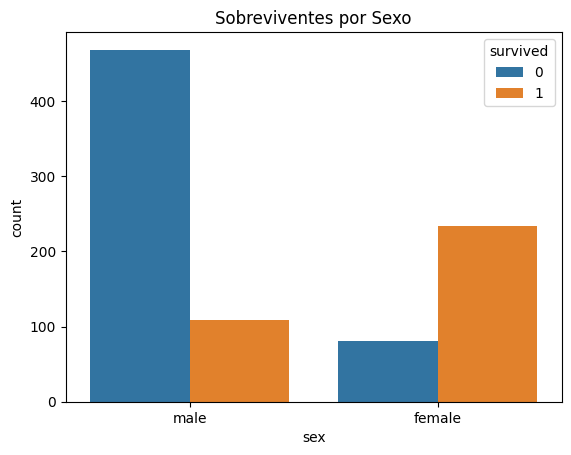

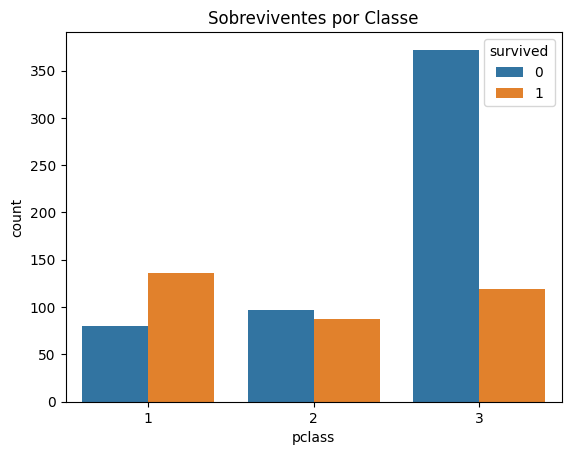

In [157]:
# Visualização da distribuição das idades
sns.histplot(df['age'], kde=True)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.show()

# Contagem de sobreviventes
sns.countplot(x='survived', data=df)
plt.title('Contagem de Sobreviventes')
plt.xlabel('Sobreviveu (0=Não, 1=Sim)')
plt.show()

# Relação entre sexo e sobrevivência
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Sobreviventes por Sexo')
plt.show()

# Relação entre classe e sobrevivência
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Sobreviventes por Classe')
plt.show()

## 🔎 Análise de Correlação e Seleção de Variáveis

Antes de selecionar as variáveis para o modelo, é importante analisar a relação entre as features e o target. Isso evita o uso de variáveis derivadas ou altamente correlacionadas com o resultado, prevenindo vazamento de dados.

In [158]:
# Correlação das variáveis numéricas com o target
corr = df.corr(numeric_only=True)
print("Correlação das variáveis numéricas com o target (survived):")
print(corr['survived'].sort_values(ascending=False))

# Análise de variáveis categóricas
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} vs survived:")
    print(df.groupby(col)['survived'].mean())

Correlação das variáveis numéricas com o target (survived):
survived      1.000000
fare          0.257307
parch         0.081629
sibsp        -0.035322
age          -0.077221
alone        -0.203367
pclass       -0.338481
adult_male   -0.557080
Name: survived, dtype: float64

sex vs survived:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

embarked vs survived:
embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64

who vs survived:
who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

embark_town vs survived:
embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64

alive vs survived:
alive
no     0.0
yes    1.0
Name: survived, dtype: float64


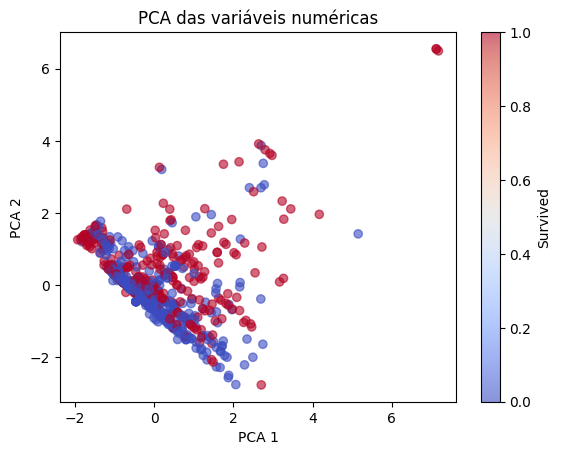

In [159]:
# PCA para análise exploratória (apenas variáveis numéricas)

num_df = df[['age', 'fare']].copy()
num_df = num_df.fillna(num_df.mean())
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(num_scaled)
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['survived'], cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA das variáveis numéricas')
plt.colorbar(label='Survived')
plt.show()

Com base nessas análises, podemos justificar a seleção das variáveis para o modelo, evitando aquelas que são derivadas do target ou que apresentam vazamento de informação.

## 🛠️ Pré-processamento dos Dados

O pré-processamento garante que os dados estejam prontos para o modelo. Inclui tratamento de valores ausentes, codificação de variáveis categóricas e normalização de variáveis numéricas.

- **Imputação:** Preenche valores ausentes para evitar perda de informação.
- **Codificação:** Transforma categorias em números para uso em algoritmos.
- **Normalização:** Padroniza escalas para evitar que variáveis dominem o modelo.

### 🔄 Pipeline completo: pré-processamento + modelo + avaliação

O pipeline garante que todo o fluxo (imputação, codificação, normalização e classificação) seja feito corretamente, sem vazamento de dados.

In [160]:
# 1. Definir features e target
features_validas = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
y = df['survived']
X = df[features_validas]

# 2. Separar treino e teste (antes de qualquer transformação)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Identificar colunas numéricas e categóricas
numeric_features = ['age', 'fare']
categorical_features = [col for col in X.columns if col not in numeric_features]

# 4. Criar pipelines de pré-processamento
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])

# 5. Pipeline final
pipeline_nb = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', GaussianNB())
])

# 6. Treinar pipeline
pipeline_nb.fit(X_train, y_train)

# 7. Avaliação no teste
y_pred = pipeline_nb.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acuracia:.4f}")
print("Matriz de Confusão:")
print(matriz_confusao)
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 8. Validação cruzada (acurácia média)
scores = cross_val_score(pipeline_nb, X, y, cv=5, scoring='accuracy')
print('Acurácia média (5-fold CV):', scores.mean())

Acurácia: 0.4078
Matriz de Confusão:
[[  7 103]
 [  3  66]]
Precisão: 0.3905
Recall: 0.9565
F1-score: 0.5546
Acurácia média (5-fold CV): 0.4118762161822861


In [161]:
# 🧑‍💻 Teste com caso real usando o pipeline
# Exemplo: mulher, 25 anos, 1ª classe, tarifa alta, sem acompanhantes, embarque mais comum

# Montar input com os mesmos nomes de colunas do X original
input_data = {
    'pclass': 1,
    'sex': 'female',
    'age': 25,
    'sibsp': 0,
    'parch': 0,
    'fare': X['fare'].max(),
    'embarked': X['embarked'].mode()[0]
}
input_df = pd.DataFrame([input_data])

# Prever com pipeline
pred = pipeline_nb.predict(input_df)[0]
print("Sobreviveu" if pred == 1 else "Não sobreviveu")

Sobreviveu


AUC (5-fold CV): 0.7640


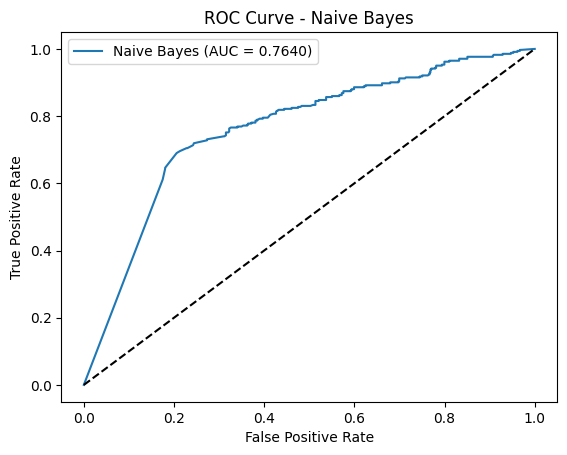

In [162]:
# 📈 Curva ROC/AUC com pipeline e validação cruzada

y_probs = cross_val_predict(pipeline_nb, X, y, cv=5, method='predict_proba')[:,1]
auc = roc_auc_score(y, y_probs)
fpr, tpr, _ = roc_curve(y, y_probs)
print(f'AUC (5-fold CV): {auc:.4f}')

plt.figure()
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

### 🔁 Comparando com Regressão Logística e Melhorando o Modelo

Vamos comparar o desempenho do Naive Bayes com o da Regressão Logística e aplicar algumas melhorias simples, como ajuste de hiperparâmetros e engenharia de features.

In [163]:
# Pipeline com Regressão Logística

pipeline_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Treinando e avaliando
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
acuracia_lr = accuracy_score(y_test, y_pred_lr)
matriz_confusao_lr = confusion_matrix(y_test, y_pred_lr)
precisao_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
scores_lr = cross_val_score(pipeline_lr, X, y, cv=5, scoring='accuracy')

print(f"Acurácia (LogReg): {acuracia_lr:.4f}")
print("Matriz de Confusão (LogReg):")
print(matriz_confusao_lr)
print(f"Precisão (LogReg): {precisao_lr:.4f}")
print(f"Recall (LogReg): {recall_lr:.4f}")
print(f"F1-score (LogReg): {f1_lr:.4f}")
print('Acurácia média (5-fold CV, LogReg):', scores_lr.mean())

Acurácia (LogReg): 0.8045
Matriz de Confusão (LogReg):
[[98 12]
 [23 46]]
Precisão (LogReg): 0.7931
Recall (LogReg): 0.6667
F1-score (LogReg): 0.7244
Acurácia média (5-fold CV, LogReg): 0.8080848659845584


In [164]:
# 🧑‍💻 Teste com caso real usando o pipeline
# Exemplo: mulher, 25 anos, 1ª classe, tarifa alta, sem acompanhantes, embarque mais comum

# Montar input com os mesmos nomes de colunas do X original
input_data = {
    'pclass': 1,
    'sex': 'female',
    'age': 25,
    'sibsp': 0,
    'parch': 0,
    'fare': X['fare'].max(),
    'embarked': X['embarked'].mode()[0]
}
input_df = pd.DataFrame([input_data])

# Prever com pipeline
pred = pipeline_lr.predict(input_df)[0]
print("Sobreviveu" if pred == 1 else "Não sobreviveu")

Sobreviveu


AUC (5-fold CV): 0.8493


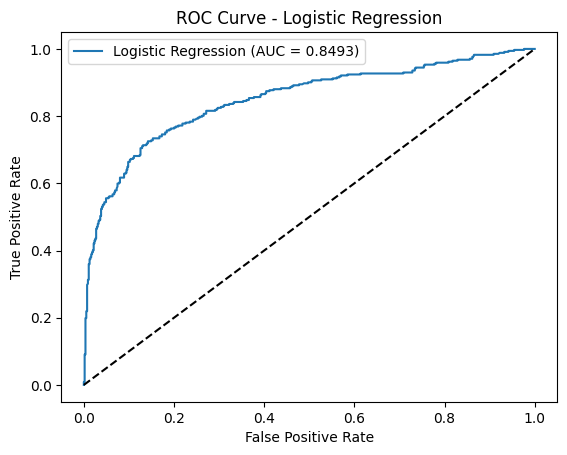

In [165]:
# 📈 Curva ROC/AUC com pipeline e validação cruzada

y_probs = cross_val_predict(pipeline_lr, X, y, cv=5, method='predict_proba')[:,1]
auc = roc_auc_score(y, y_probs)
fpr, tpr, _ = roc_curve(y, y_probs)
print(f'AUC (5-fold CV): {auc:.4f}')

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()